# Data Visualization

Select a dataset we have used in class (or outside of class).

Generate a plot that you feel visualizes the data is an interesting way. Your plot should have the following elements:

>1) Title
>2) Legend
>3) Axes or other Labels
>4) Color
>5) 1 sentence description of what your plot shows
>6) Brief description of why you chose to make the plot the way you did.

You may use pandas, matplotlib, or seaborn.

Upload a pdf of the plot to Canvas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")


In [3]:
facts.head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198956.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32197.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1660272,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197881,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


In [4]:
facts['Pop_density']= facts['Pop_2020']/facts["Area_land"]
facts[['State','Pop_density']].sort_values(by='Pop_density', ascending=False).tail()

,State,Pop_density
28,Montana,2.876218
55,Wyoming,2.293916
1,Alaska,0.496221
12,Guam,0.310129
37,Northern Mariana Islands,0.108051


In [5]:
df = facts[['Pop_2020','Pop_density', 'Area_water']].sort_values(by='Pop_density', ascending=True)


In [6]:
df.head()

,Pop_2020,Pop_density,Area_water
37,51.0,0.108051,4644
12,168.4,0.310129,935
1,733391.0,0.496221,245384
55,576851.0,2.293916,1864
28,1084225.0,2.876218,3869


In [7]:
cleandf = df.drop(index=[37, 12,9])

In [8]:
cleandf.tail()

,Pop_2020,Pop_density,Area_water
48,106235.0,305.272989,1550
23,7029917.0,347.981239,7134
42,3285874.0,370.531574,4924
43,1097379.0,409.775579,1324
32,9288994.0,487.688035,3544


In [9]:
#plot = cleandf.plot.scatter(x='Area_water', y=['Pop_2020'],color ='blue')
#plt.xlabel('Water Area') 
#plt.ylabel('Population(2020)') 
#plt.title("Population vs Water Area per Entity")


Text(0.5,1,'Population vs Water Area per Entity')

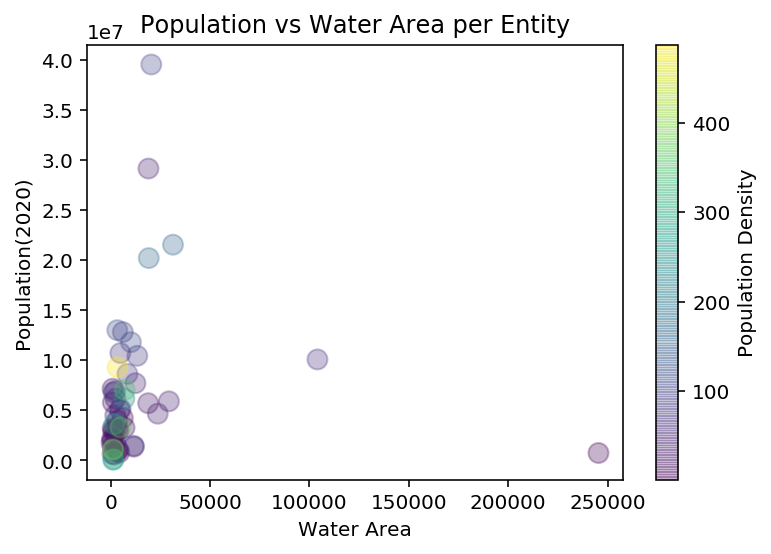

In [10]:
rng = np.random.RandomState(0)
x = cleandf['Area_water']
y = cleandf['Pop_2020']
colors = cleandf['Pop_density']
#rng.rand(54)
sizes = 100

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
cbar = plt.colorbar();  # show color scale
cbar.set_label('Population Density')
plt.xlabel('Water Area') 
plt.ylabel('Population(2020)') 
plt.title("Population vs Water Area per Entity")


This is a plot showing the relationship between an entity's population and the amount of water available in the entity. 

The points on the scatter plot are colored based on the population density of each entity. 3 outliers were removed. Guam and Northern Mariana Islands were removed due to having incorrect data. District of columbia has a very high population density because it is only a city. This impacts the scale of the density colors, so it was removed to make the the graph colors more accurate.